# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Loading the dataset

In [2]:
data=pd.read_csv('used_device_data.csv')
df=data.copy()

## Data Overview

- Observations
- Sanity checks

In [3]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [5]:
print('There are',df.shape[0],'Rows, and', df.shape[1], 'columns')

There are 3454 Rows, and 15 columns


- There are 3454 rows and 15 columns.
- From the 15 columns, we have 11 numerical columns and 4 categories.
- The info suggests we have missing values in some of the columns.


In [6]:
pd.DataFrame({'Count': df.isnull().sum()}) #isnull to count the missing values

,Count
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


- We have 6 colums with missing values:
    - main_camera_mp:	179
    - selfie_camera_mp:	2
    - int_memory: 4
    - ram: 4
    - battery: 6
    - weight:	7

In [7]:
df.describe().T #statistical summary

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


- Screen_size= Average screen size of the phones is :13.7 cm 
- main_camera_mp: The Average resolution for the main camera is around 9.5 megapixels. We can see there is a big difference between the 75% of the data and the max. which tell us there are some outliers in this column.
- ram: Most of the refurbished phones have 4gb of ram.
- battery: energy capacity of the phone batteries goes between 500 mAh and 9720 mAh
- weight  the average devices weight is 182.7 g 
- release_year= We have phones from 2013 to 2020.
- days_used= the average use of the phones is  675 days and the maximum is 1094 days.
- normalized_used_price=  The min price for used phones is  1.536867 euros  and the maximum is 6.619433 euros.
- normalized_new_price  for new devices the min price is  2.9 euros and maximum 7.847841 euros.

In [8]:
# Returns Statistical summary of the data for object Datatype
data.describe(exclude=[np.number]).T

,count,unique,top,freq
brand_name,3454,34,Others,502
os,3454,4,Android,3214
4g,3454,2,yes,2335
5g,3454,2,no,3302


- There are:
   - 34 different brands
   - 4 operative system and Android is the most common one. 
   - 4g network is most frequent in the devices.

In [9]:
duplicates=df.duplicated().sum() #to check the duplicates
duplicates

0

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

###Univariate Analysis

In [10]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="purple"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [11]:
# creating label barplots with a function 


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Set3",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [12]:
df['brand_name'].value_counts() 

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: brand_name, dtype: int64

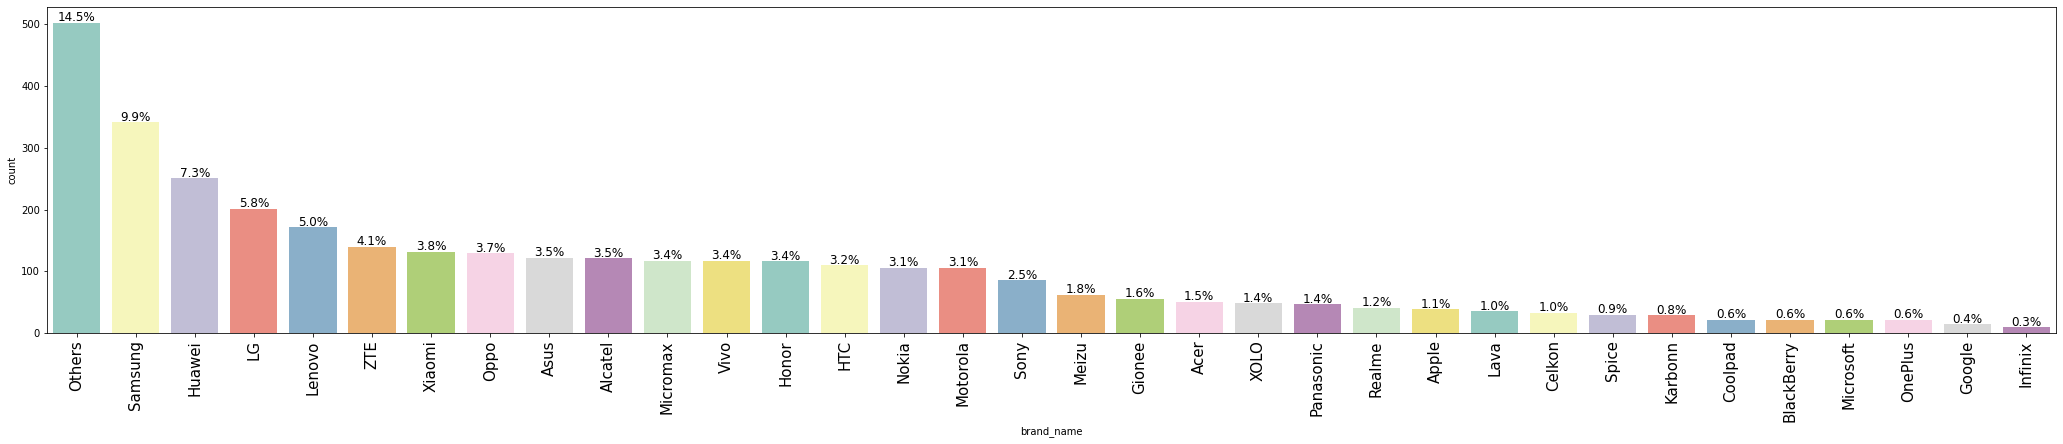

In [13]:
labeled_barplot(df, "brand_name", perc=True)

- 502 devices, Around 14,5% of the total, have an unknown brand.
- Second most frequent brand is Samsung with 9,9%.
- The least popular brand in the data is Infinix

In [14]:
df['os'].value_counts()

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64

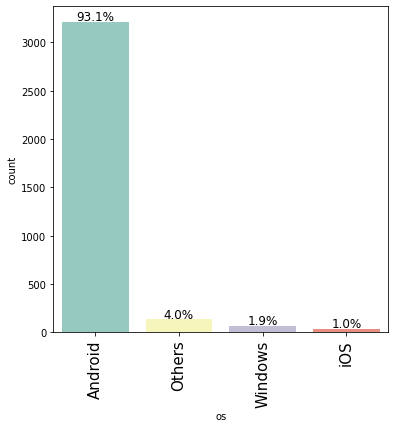

In [15]:
labeled_barplot(df, "os", perc=True)

- Of all the phones in the dataset, 93% of them run on the Android operating system, making it the most popular OS with 3,214 devices.

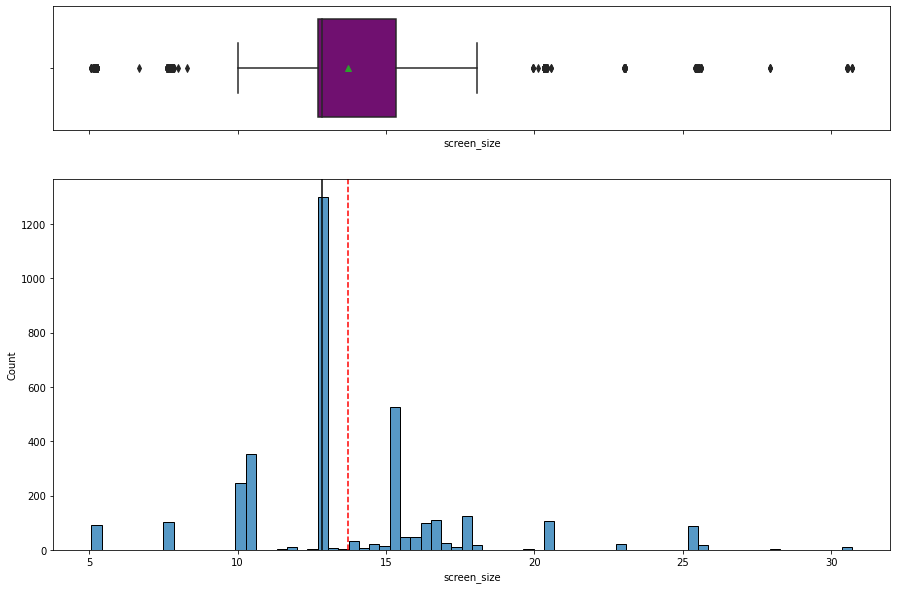

In [16]:
histogram_boxplot(df, "screen_size")

- It is right skewed
- There are outliers.
- 75% of the data is between 10 cm and 15cm


In [17]:
df['4g'].value_counts()

yes    2335
no     1119
Name: 4g, dtype: int64

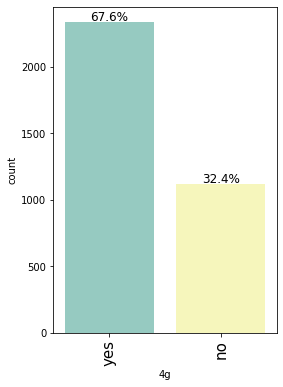

In [18]:
labeled_barplot(df, "4g", perc=True)

- The graph shows that approximately 68% of the devices in the dataset have access to the 4G network.

In [19]:
df['5g'].value_counts()

no     3302
yes     152
Name: 5g, dtype: int64

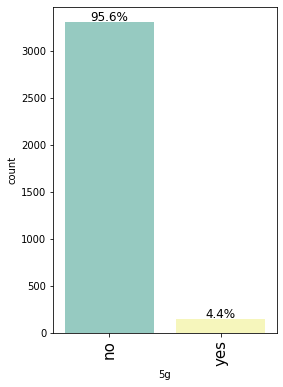

In [20]:
labeled_barplot(df, "5g", perc=True)

- The graph shows that around 4,4% of the devices in the dataset have access to the 5G network.

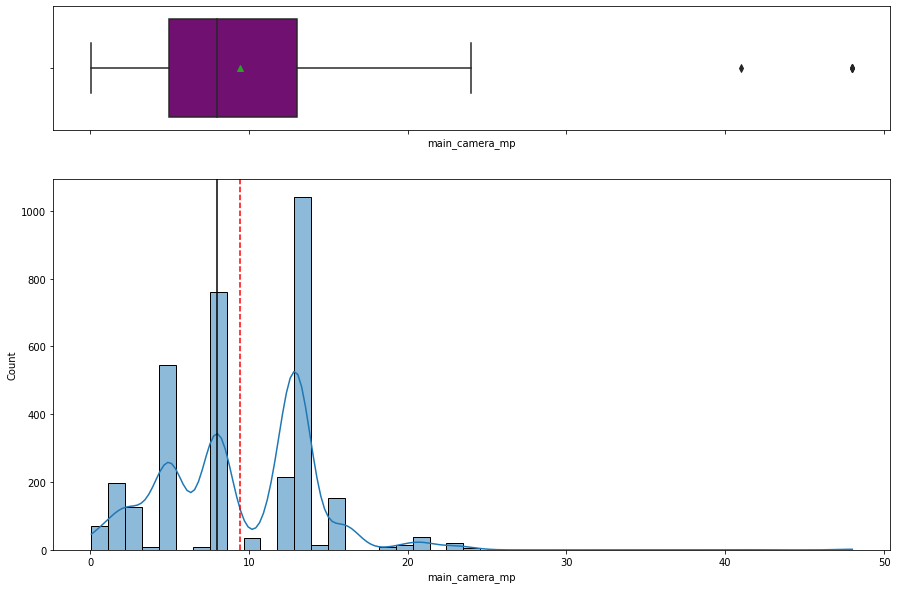

In [21]:
histogram_boxplot(df, "main_camera_mp", kde=True)

- The distribution of main_camera_mp is right-skewed, with some outliers or extreme values over 40mp.
- The median is nearly 8 megapixels and the average resolution for the rear camera is around 9 megapixels.


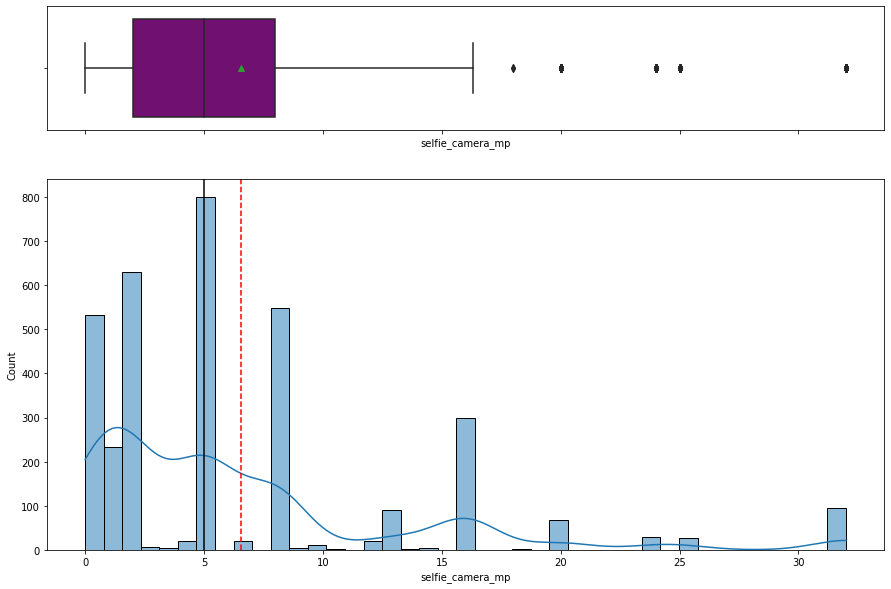

In [22]:
histogram_boxplot(df, "selfie_camera_mp", kde= True)

- 75% of the devices have 8 megapixels or less in the front camera.
- Median is about 5 mp and average around 6,5 mp

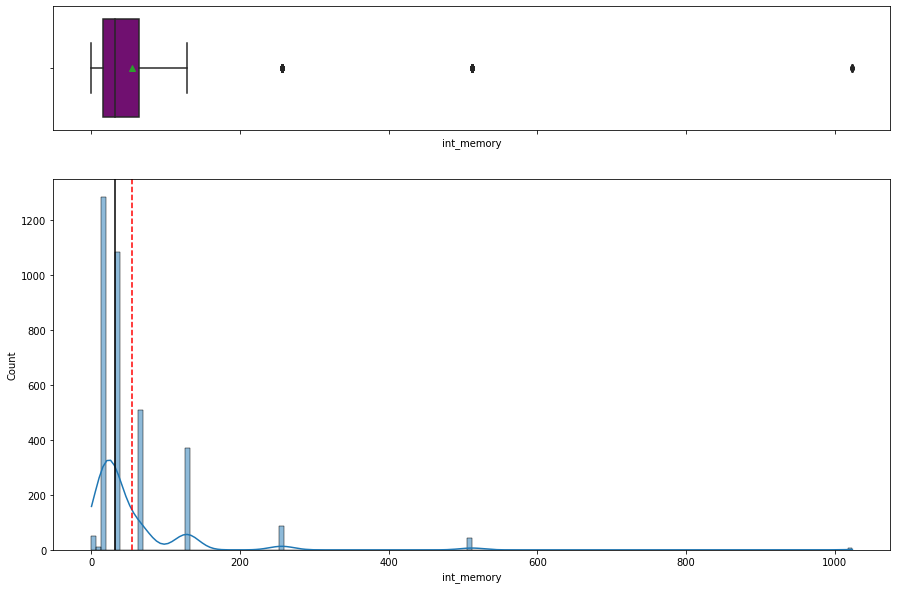

In [23]:
histogram_boxplot(df, "int_memory", kde=True)

- The distribution is skewed to the right.
- The range of values goes from 0 to 1024.
-75% of the devices have 64Gb or less of internal memory



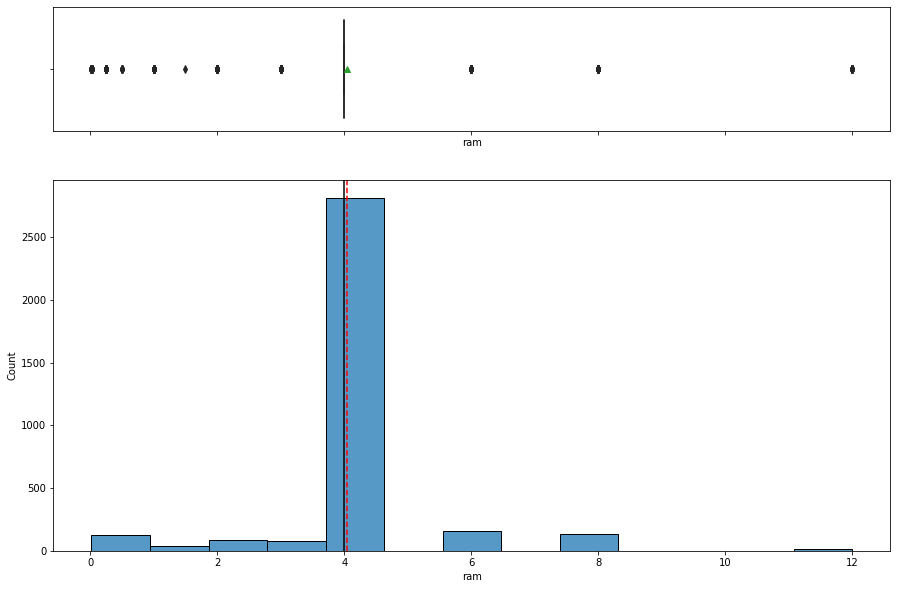

In [24]:
histogram_boxplot(df, "ram")

- Median and Average are pretty close around 4Gb.
- Most of the devices have a ram of 4GB, around 81%.

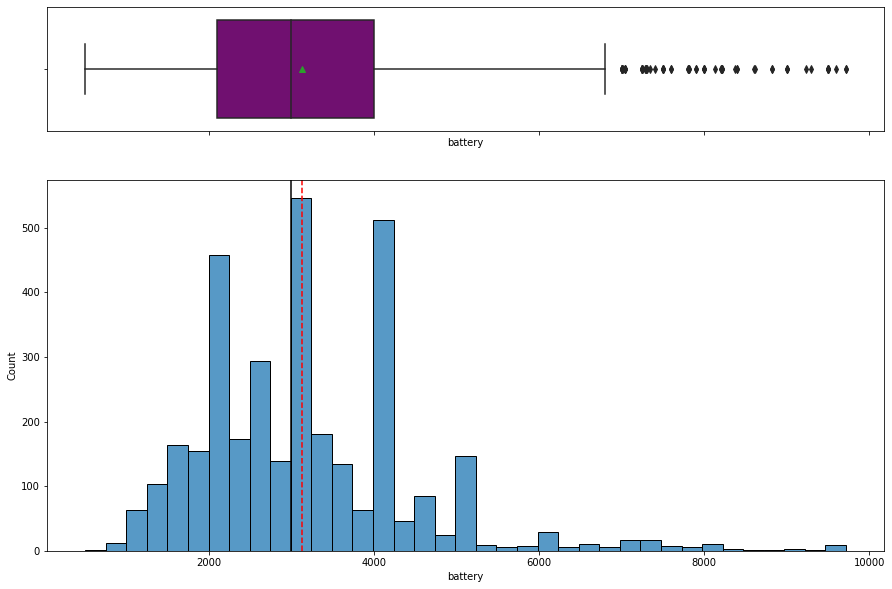

In [25]:
histogram_boxplot(df, "battery")

- 75% of the devices have a battery between 500 mah and 4000 mah
- The average battery capacity is around 3100 mah

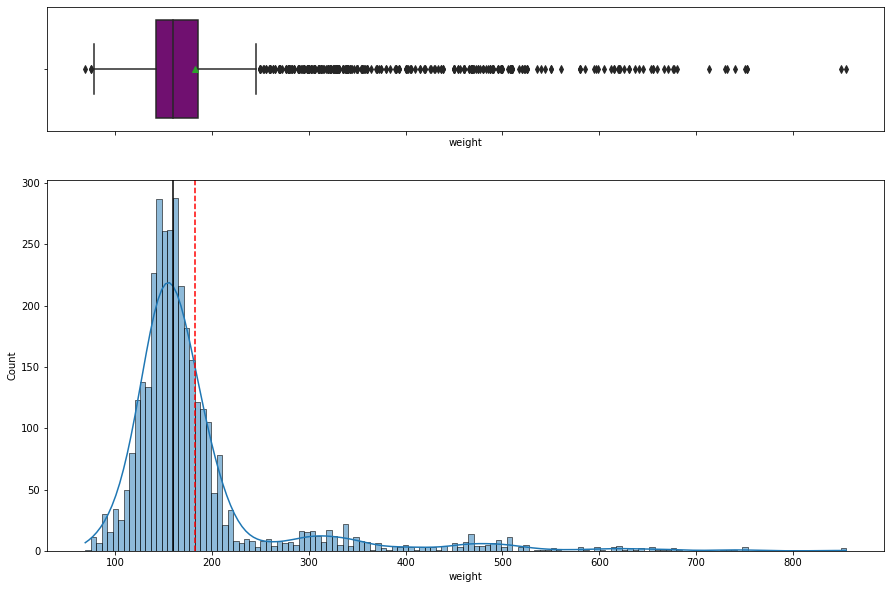

In [26]:
histogram_boxplot(df, "weight", kde= True)

- Weight is right skewed
- 75% of the used devices weight under 185g
- The average weight is around 182

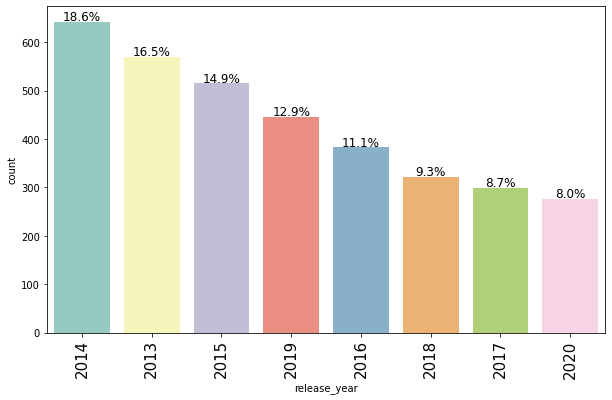

In [27]:
labeled_barplot(df, "release_year", perc=True)

- Devices are released between 2013 and 2020.
- The majority, about 50%, of the devices were manufactured during 2013-2015.
- 2014 is the year with the most devices, representing 18.6% of the total

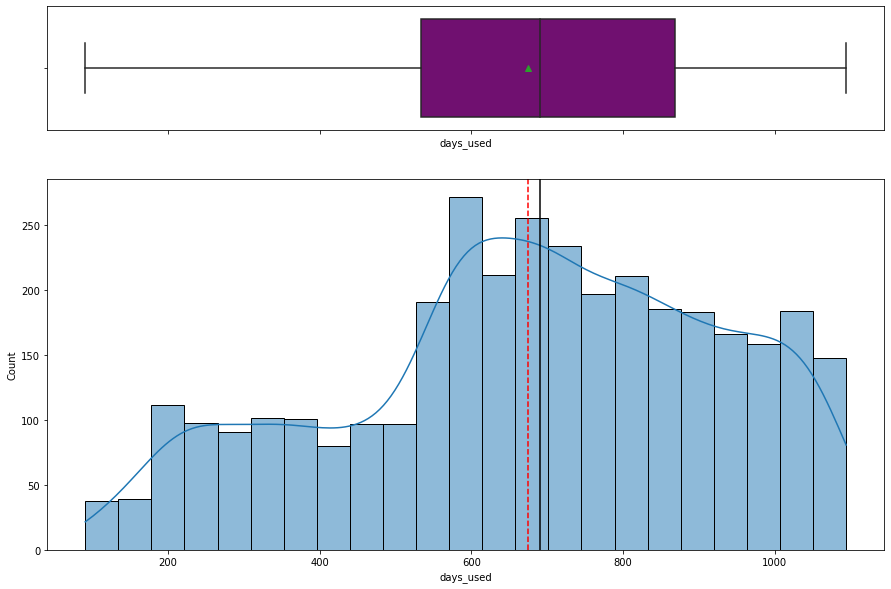

In [28]:
histogram_boxplot(df, "days_used", kde= True)

- The distribution of the column days used is slightly left-skewed with a median of 690 and average of 674 days.

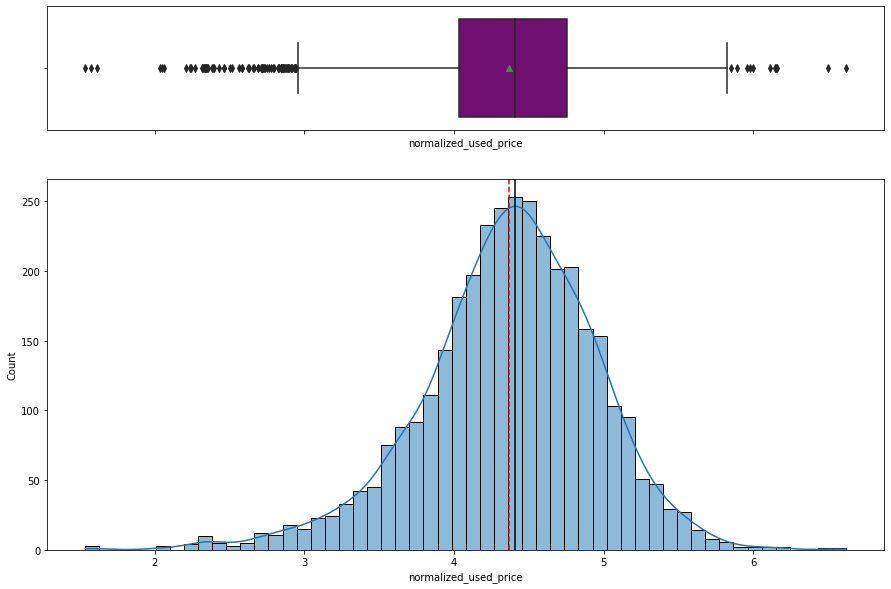

In [29]:
histogram_boxplot(df,'normalized_used_price', kde=True)

- The distribution of normalized used price is pretty close to normal. Median and mean are really close 4,4 and 4,36 respectively.

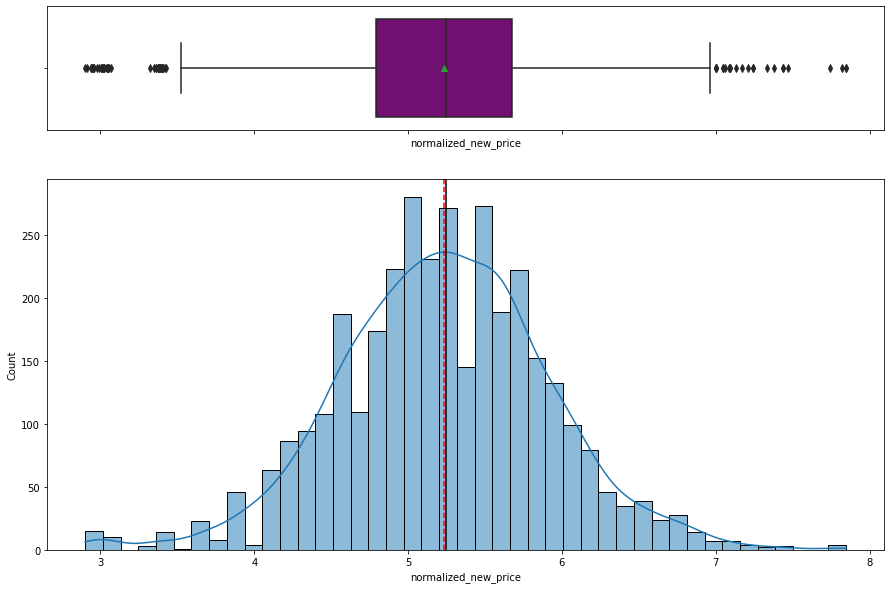

In [30]:
histogram_boxplot(df, "normalized_new_price", kde=True)

- New price is normally distributed with a median(5.24) average(5.23) pretty close to each other.
- 75% of the data is under 6 euros.

###Bivariate Analysis

In [31]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# dropping release_year as it is a temporal variable
num_cols.remove("release_year")

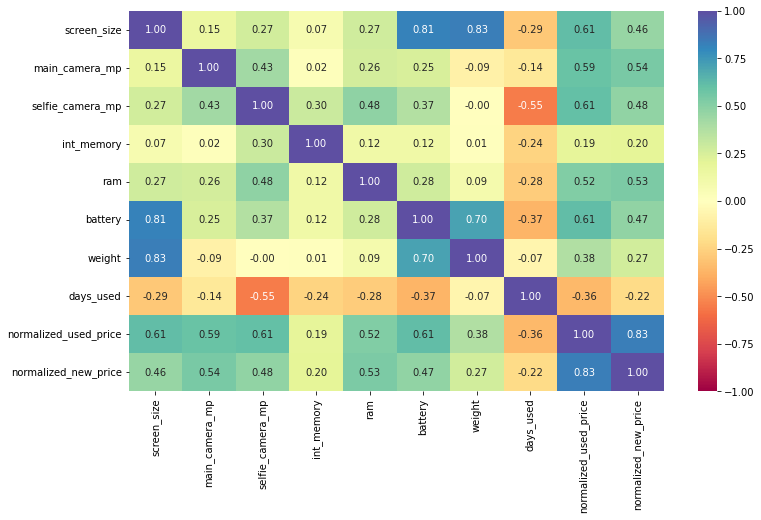

In [32]:
plt.figure(figsize=(12, 7))
sns.heatmap(df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- There is a positive correlation between screen size and weight.
- Also, there is a positive correlation between battery and weight.
- The strongest positive correlation is between Normalized used price and normalized new price.


- The biggest negative correlation is between days used for a selfie Camera mp. 

#### Brand vs Screen Size

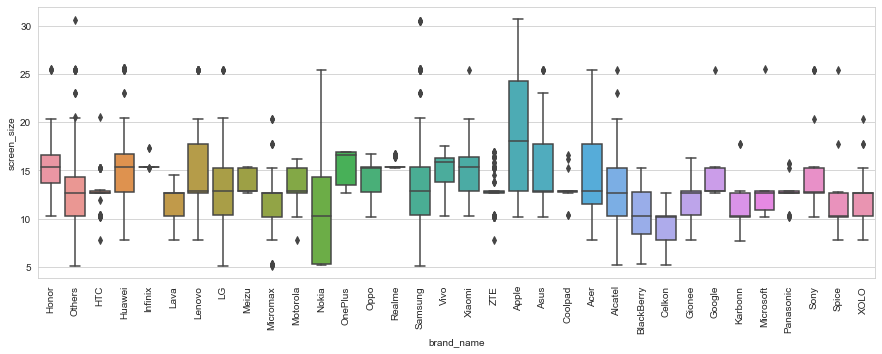

In [33]:
plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")
sns.set_palette("Set3")
sns.boxplot(data=df, x="brand_name", y="screen_size")
plt.xticks(rotation=90)
plt.show()

- Apple has the devices with larger screens starting with a min of 10cm and a max of 30 cm.
- Nokias has smaller screens.

#### Brand vs Network(4g,5g)

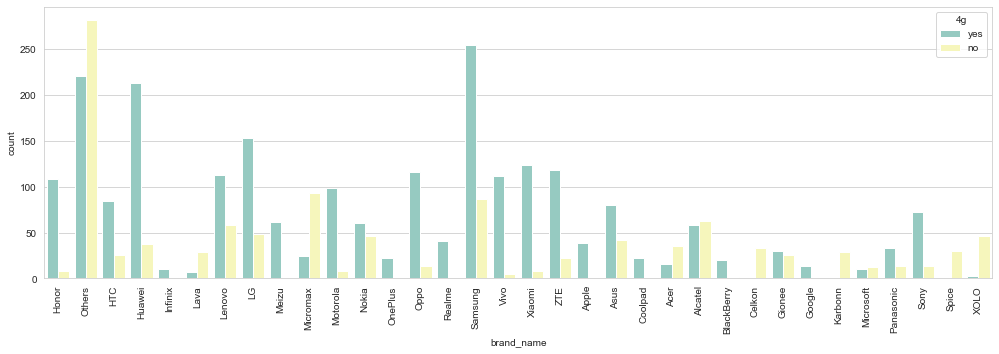

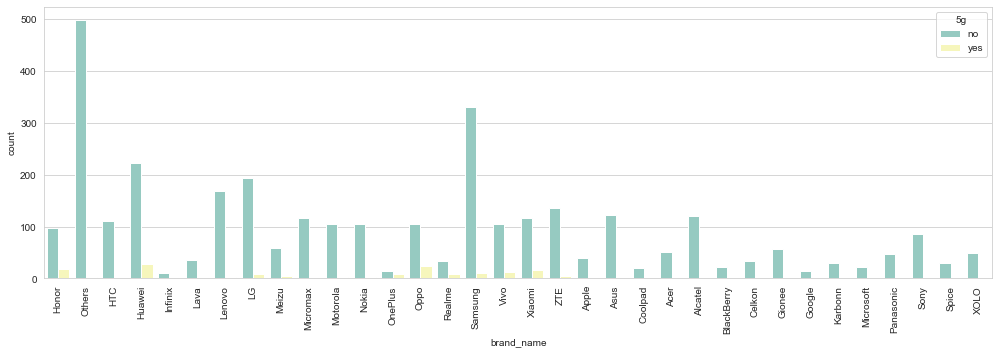

In [34]:
plt.figure(figsize=(17, 5))
sns.set_style("whitegrid")
sns.set_palette("Set3")
sns.countplot(data=df, x='brand_name',hue='4g')
plt.xticks(rotation=90);
plt.show()
plt.figure(figsize=(17, 5))
sns.set_style("whitegrid")
sns.set_palette("Set3")
sns.countplot(data=df, x='brand_name',hue='5g')
plt.xticks(rotation=90);
plt.show()

- Most of the brands have devices with 4g network available
- Just a few brands offer 5g network in some of the devices:
    - Honor, Huawei, Lg, Oneplus, Oppo, Realme, Samsung, Vivo, Xaomi and ZTE.

#### Release year vs Normalized used price

<Axes: xlabel='release_year', ylabel='normalized_used_price'>

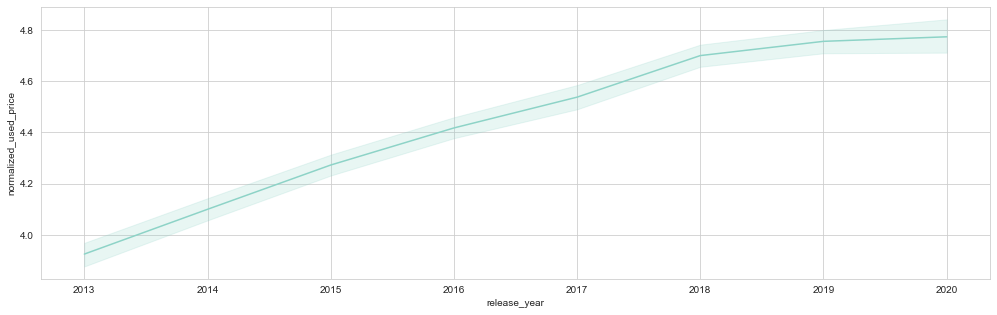

In [35]:
plt.figure(figsize=(17, 5))
sns.set_style("whitegrid")
sns.set_palette("Set3")
sns.lineplot(data=df, x='release_year', y='normalized_used_price') 

- The price for used devices has shown a noticeable rise since 2013, with stabilization in price after 2018. 

#### Release year vs Normalized new price

<Axes: xlabel='release_year', ylabel='normalized_new_price'>

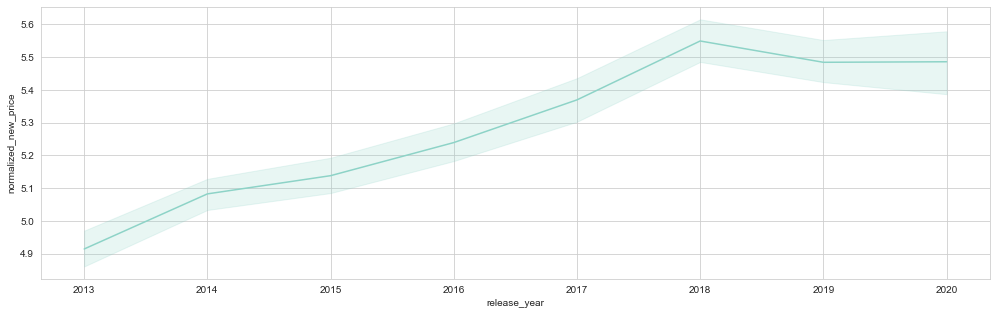

In [36]:
plt.figure(figsize=(17, 5))
sns.set_style("whitegrid")
sns.set_palette("Set3")
sns.lineplot(data=df, x='release_year', y='normalized_new_price') 

#### Brand vs Ram

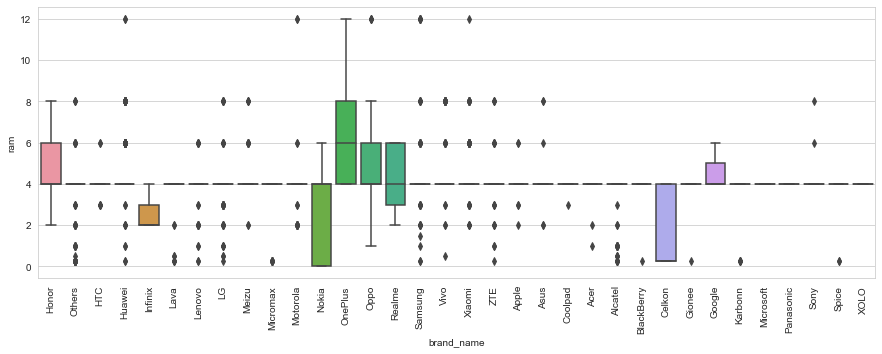

In [37]:
plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")
sns.set_palette("Set3")
sns.boxplot(data=df,x="brand_name", y="ram")
plt.xticks(rotation=90);

- OnePlus offer in average the most ram
- Most of the brands offer at least 4gb in ram
- Celkon offer in average the phones with less ram 

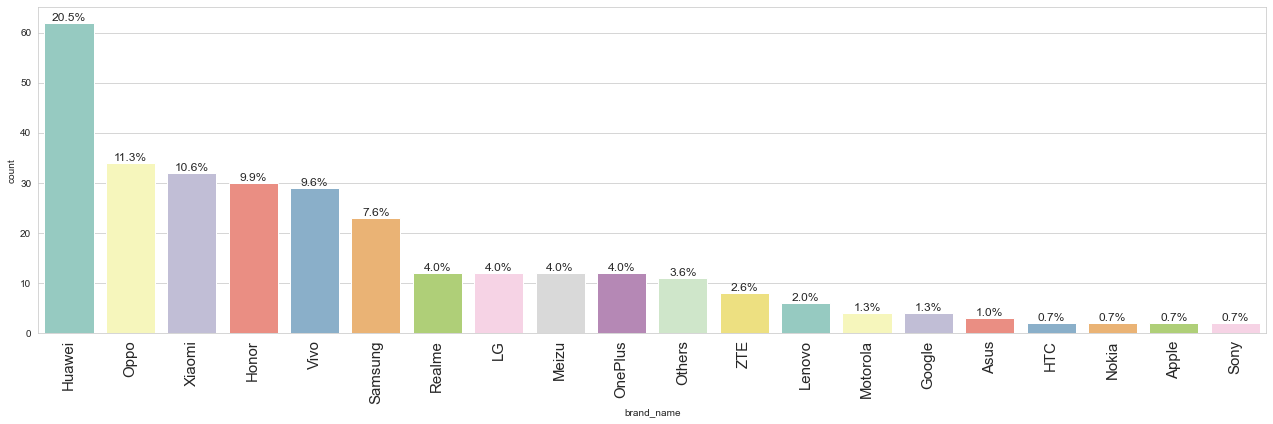

In [38]:
large_ram = df[df['ram'] > 4]
labeled_barplot(large_ram, "brand_name", perc=True);

- Huawei has 20,5% of the devices with more than 4 gb of ram, follow by Oppo with 11.3%

#### Battery > 4500 vs brand

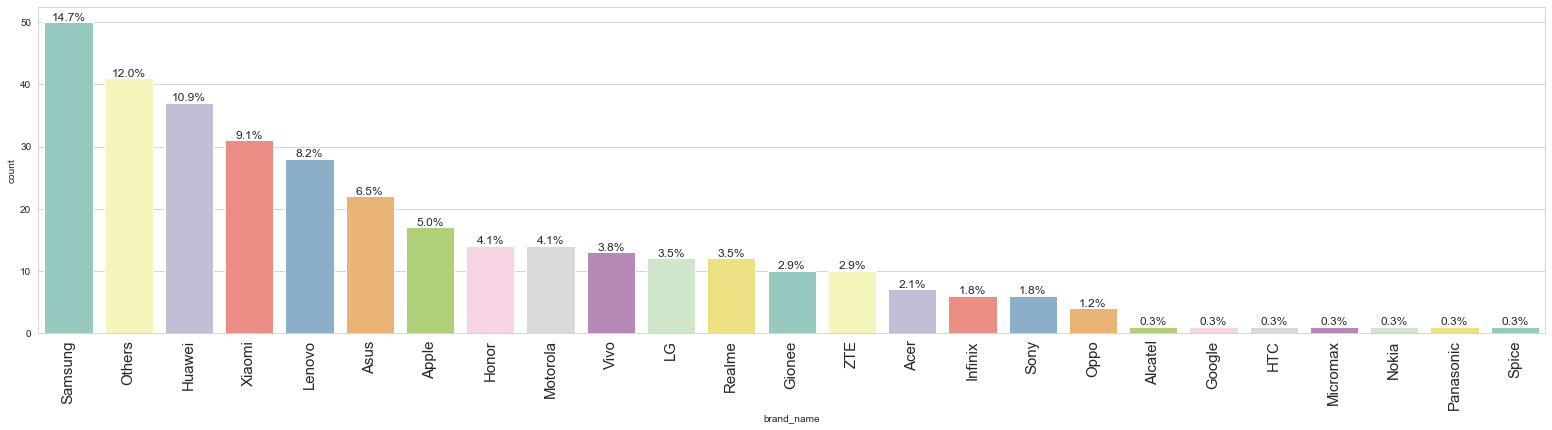

In [39]:
large_battery = df[df['battery'] > 4500]
labeled_barplot(large_battery, "brand_name", perc=True);

- Samsung, at 14.7%, has the most used devices with a battery over 4500 mAh, followed by 'Others' at 12% out of 341 devices in the data over 4500 mAh.

#### Battery > 4500. Weight vs Weight

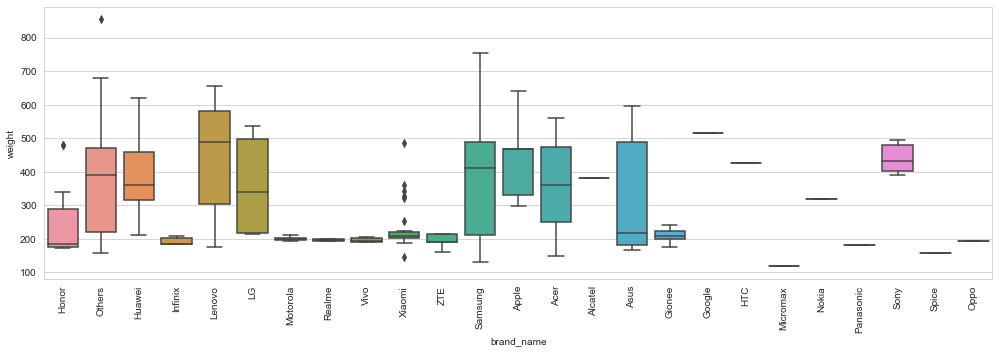

In [40]:
plt.figure(figsize=(17, 5))
sns.set_style("whitegrid")
sns.set_palette("Set3")
sns.boxplot(data=large_battery,x="brand_name", y="weight")
plt.xticks(rotation=90);

- Huawei has 20,5% of the devices with more than 4 gb of ram, follow by Oppo with 11.3%

- Samsung, at 14.7%, has the most used devices with a battery over 4500 mAh, followed by 'Others' at 12% out of 341 devices in the data over 4500 mAh.

- From  the 25 brands that have devices with battery over 4500 mAh, the brands Micromax, Spice and Panasonic have the lowest weight under 200 g.
 - 75% of the 341 devices have a weight under 470g
 - Samsung, lenovo and other brands have the largest range and higher values of weight.
     - 75% of the samsung devices with a battery > 4500 mAh are between 130g and nearly 489g
     - Samsung and Lenovo have the highest number of devices that weigh over 500g
- The brands with devices that weigh the less are samsung, xiaomi and micromax with values under 150g

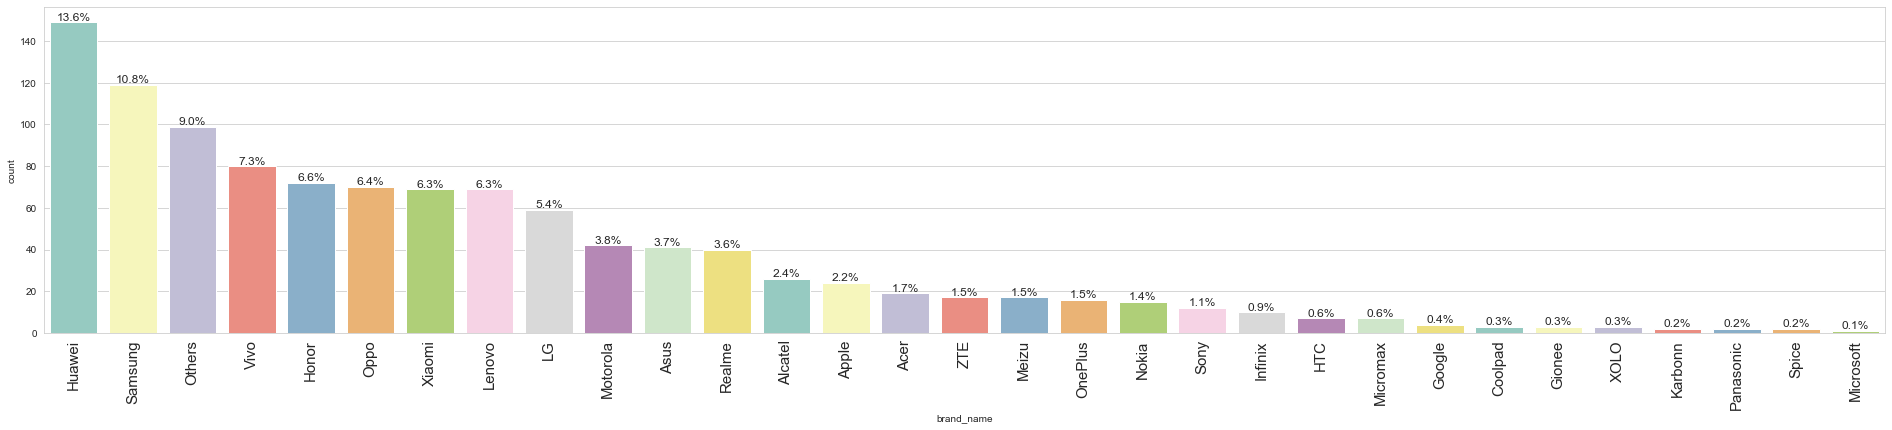

In [41]:
df_large_screen = df[df['screen_size'] > 6 * 2.54]
labeled_barplot(df_large_screen, "brand_name", perc=True);

In [42]:
df_large_screen.shape

(1099, 15)

- There are 1099 devices with a screen over 6 inches.
- From those 1099, the brands that have more devices with a screen over 6 inches:
    - Huawei: 149 (13.6%)
    - Samsung: 119 (10.8%)
    - Others: 99 (9.0%)
    - Vivo: 80 (7.3%)
    - Honor: 72 (6.6%)
- The brands that have less devices with  a screen over 6 inches:   
 - Panasonic: 2 (0.2%)
 - Spice: 2 (0.2%)
 - Microsoft: 1 (0.1%)

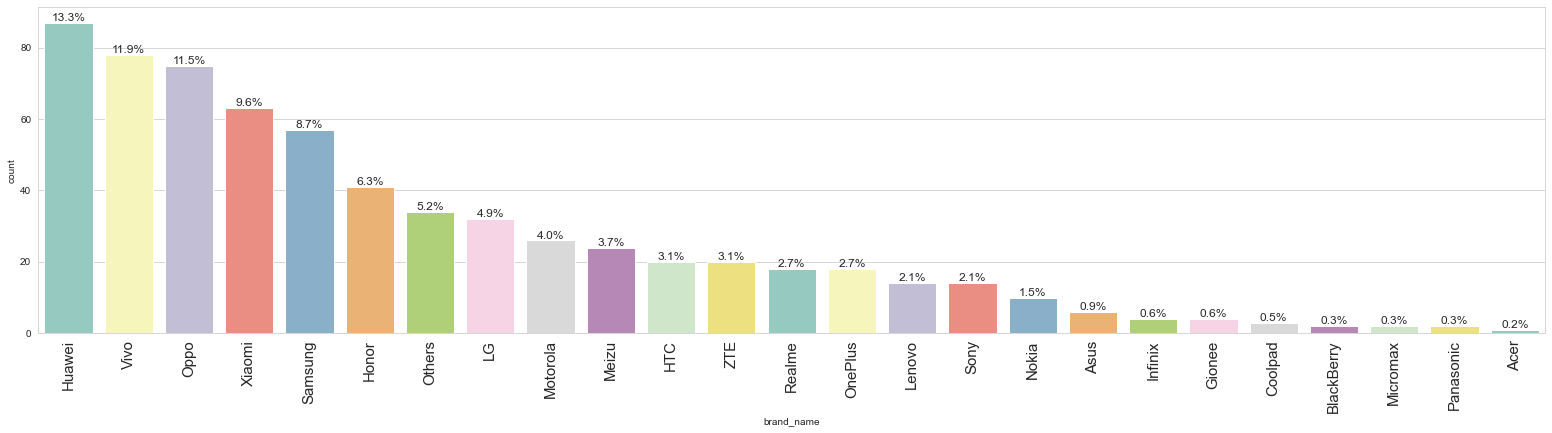

In [43]:
df_selfie_camera = df[df['selfie_camera_mp'] > 8]
labeled_barplot(df_selfie_camera, "brand_name", perc=True);

- from the 655 devices that have a selfie camera resolution over 8 megapixels, Huawei has the highest number of devices at 13.3%, follow by vivo with 11.9% and Oppo with 11.5%
- Acer has the fewest devices with a selfie camera over 8 mp at 0.2%

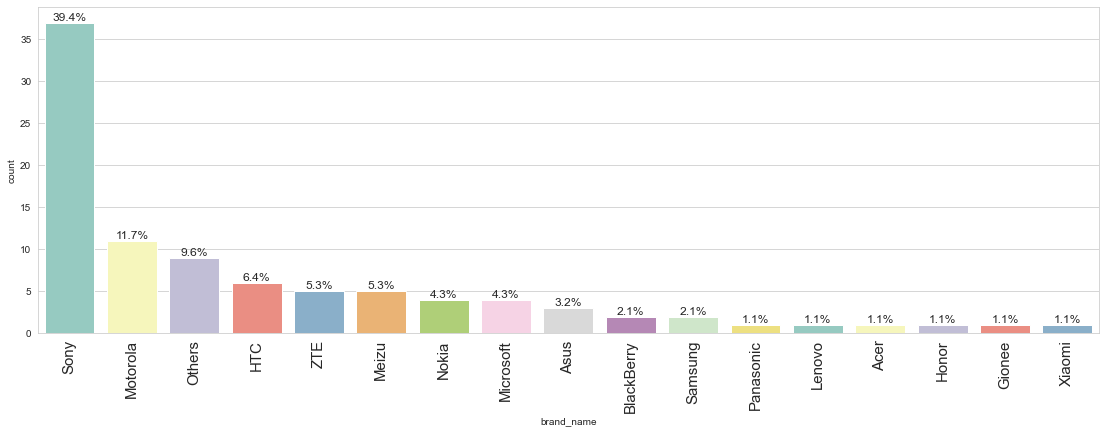

In [44]:
df_main_camera = df[df['main_camera_mp'] > 16]
labeled_barplot(df_main_camera, "brand_name", perc=True);

- From the 34 brands just 17 have devices with more than 16 megapixels in the main camera.
- Sony offers devices with the best resolution in the main camera. Around 39% of the devices with more than 16 megapixels.

#### Normalized used price vs network (4g, 5g)

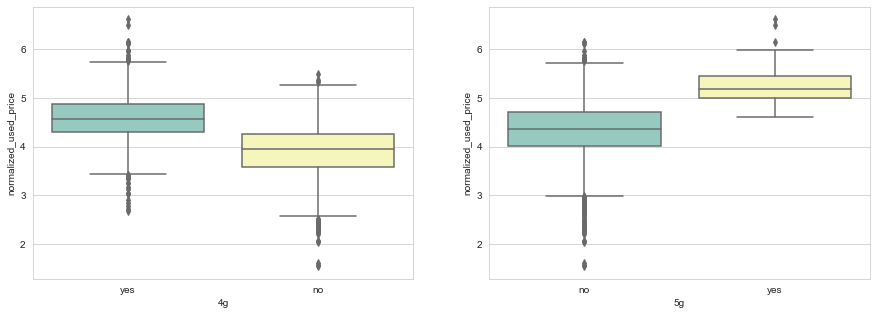

In [45]:
plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")
sns.set_palette("Set3")
plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

- Price for used devices with 5g network is higher than those with 4g network.

### Observations:
1. What does the distribution of normalized used device prices look like?
   - The distribution of normalized used prices is bell shaped and pretty close to normal. Median and mean are really close, 4.4 and 4.36 respectively.
2. What percentage of the used device market is dominated by Android devices?
   - 93% (3,214) of the used devices have the Android operating system, making it the most popular.
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
   - Around 81% of the devices have at least 4gb.
   - Huawei has 20.5% of the devices with more than 4 gb of ram, followed by Oppo with 11.3%
   - The brands that have the lowest ram in average are Nokia, Celkon and Infinix. 
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
 - From  the 25 brands that have devices with a battery over 4500 mAh, the brands Micromax, Spice and Panasonic have the lowest weight under 200 g.
 - 75% of the 341 devices have a weight under 470g
 - Samsung, lenovo and "other brands" have the largest range and the heaviest.
     - 75% of the samsung devices with a battery > 4500 mAh are between 130g and nearly 489g
     - Samsung and Lenovo have the highest number of devices that weigh over 500g


5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
 - There are 1099 devices with a screen over 6 inches.
 - From those 1099, the brands that have more devices with a screen over 6 inches:
     - Huawei: 149 (13.6%)
     - Samsung: 119 (10.8%)
     - Others: 99 (9.0%)
     - Vivo: 80 (7.3%)
     - Honor: 72 (6.6%)


6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?


 - from the 655 devices that have a selfie camera resolution over 8 megapixels, Huawei has the highest number of devices at 13.3%, follow by vivo with 11.9% and Oppo with 11.5%
 - Acer has the fewest devices with a selfie camera over 8 mp at 0.2%


7. Which attributes are highly correlated with the normalized price of a used device?

 - Normalized price of a used device is highly correlated with normalized price of a new device at 0.83.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Treatment

In [46]:
df1=df.copy() #creating a copy of the data

In [47]:
df1.isnull().sum() #Checking again the columns with missing values

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [48]:
missing_main_cam_mp=df1[df1['main_camera_mp'].isnull()] #checking missing values in each column
missing_main_cam_mp.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297


In [49]:
missing_main_cam_mp['brand_name'].value_counts()

Realme        36
Xiaomi        23
Oppo          20
Motorola      18
OnePlus       17
Meizu         15
Vivo          14
Infinix       10
Sony           7
ZTE            4
Asus           4
BlackBerry     4
Coolpad        3
Lava           2
Panasonic      2
Name: brand_name, dtype: int64

In [50]:
missing_main_cam_mp['release_year'].value_counts()

2020    122
2019     45
2018     10
2017      2
Name: release_year, dtype: int64

In [51]:
missing_selfie_camera_mp=df1[df1['selfie_camera_mp'].isnull()]

In [52]:
missing_int_memory=df1[df1['int_memory'].isnull()] 

In [53]:
df1[df1['ram'].isnull()] 

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
114,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,1020.0,91.3,2020,288,2.729159,2.911263
335,Nokia,Others,5.18,no,no,0.3,0.0,0.10,NaN,1200.0,88.2,2020,327,3.062924,3.689129
2059,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,NaN,82.6,2016,1023,2.765060,3.657905
2090,Nokia,Others,7.62,no,no,5.0,0.0,0.06,NaN,1200.0,111.4,2013,1001,3.827771,4.605770


In [54]:
df1[df1['battery'].isnull()] 

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1829,Meizu,Android,12.83,yes,no,13.0,5.0,16.00,4.00,NaN,145.0,2014,986,4.177919,4.863604
1831,Meizu,Android,12.83,yes,no,20.7,5.0,16.00,4.00,NaN,158.0,2014,1043,4.878855,5.990639
1832,Meizu,Android,13.61,yes,no,20.7,2.0,16.00,4.00,NaN,147.0,2014,1007,4.742320,5.826118
1962,Microsoft,Windows,25.55,no,no,5.0,3.5,32.00,4.00,NaN,675.9,2013,931,5.230574,5.802753
2058,Nokia,Others,5.18,no,no,0.3,0.0,0.06,0.02,NaN,81.0,2016,815,2.718660,3.374511
2059,Nokia,Others,5.18,no,no,0.3,0.0,0.06,NaN,NaN,82.6,2016,1023,2.765060,3.657905


In [55]:
df1[df1['weight'].isnull()]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3002,XOLO,Android,12.70,yes,no,13.0,5.0,32.0,4.0,2400.0,NaN,2015,576,4.165890,4.930437
3003,XOLO,Android,12.83,yes,no,8.0,5.0,16.0,4.0,3200.0,NaN,2015,800,4.282068,5.189228
3004,XOLO,Android,12.70,no,no,8.0,2.0,32.0,4.0,2100.0,NaN,2015,878,3.879706,4.081090
3005,XOLO,Android,10.29,no,no,5.0,0.3,32.0,4.0,1800.0,NaN,2015,1036,3.823847,4.396053
3006,XOLO,Android,12.70,no,no,5.0,0.3,16.0,4.0,2500.0,NaN,2015,679,3.837084,4.347176
3007,XOLO,Windows,12.70,no,no,8.0,2.0,32.0,4.0,2200.0,NaN,2015,838,3.707210,4.791733
3008,XOLO,Android,12.70,no,no,8.0,5.0,32.0,4.0,2500.0,NaN,2015,1045,4.184642,4.785406


### Observations:

- We have six columns with missing values:
1. main_camera_mp:           179
   - The 179 missing values are from 15 different brands and were released between 2017 and 2020.
   - 122 of the 179 missing values were released in 2020
2. selfie_camera_mp:           2
   - The 2 missing values have almost the same specifications. Both are from the same brand, google.
   - Both are also released in the same year
3. int_memory:                 4
   - There are 4 missing values for the same brand, Nokia.
4. ram:                        4
   - The four missing values are also from Nokia and they have similar specifications.
5. battery:                    6
   - The values missing belong to 3 different brands, Meizu, Microsoft y Nokia
6. weight:                     7
   - All the missing values have in common the brand, XOLO and also the year that was released, 2015.

- After analyzing every column with missing values, we found that the year of release and brand name columns are the most appropiate to group by, to treat the null values. However, dropping the rows with missing values is not an appropriate option as these rows hold significant information. Therefore, we have decided to fill the missing values with the median of similar categories to the missing values in these columns because of the presence of outliers. This approach will help to preserve the existing data while also addressing the issue of missing values.

In [56]:
cols_missing_v = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]
for col in cols_missing_v:
    df1[col] = df1[col].fillna(
        value=df1.groupby(["release_year", "brand_name"])[col].transform("median")
    )  
df1.isnull().sum()  

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [57]:
cols_missing_v = [
    "main_camera_mp","selfie_camera_mp","int_memory","ram","battery","weight"]
for col in cols_missing_v:
    df1[col] = df1[col].fillna(value=df1.groupby(["brand_name"])[col].transform("median"))  
df1.isnull().sum()  

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [58]:
#Imputing the missing values in the data by the column medians
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

# checking for missing values
df1.isnull().sum() 

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [59]:
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


### Feature engineering

In [60]:
df1["years_run"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_run"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_run, dtype: float64

In [61]:
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_run
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1


### Outlier Detection

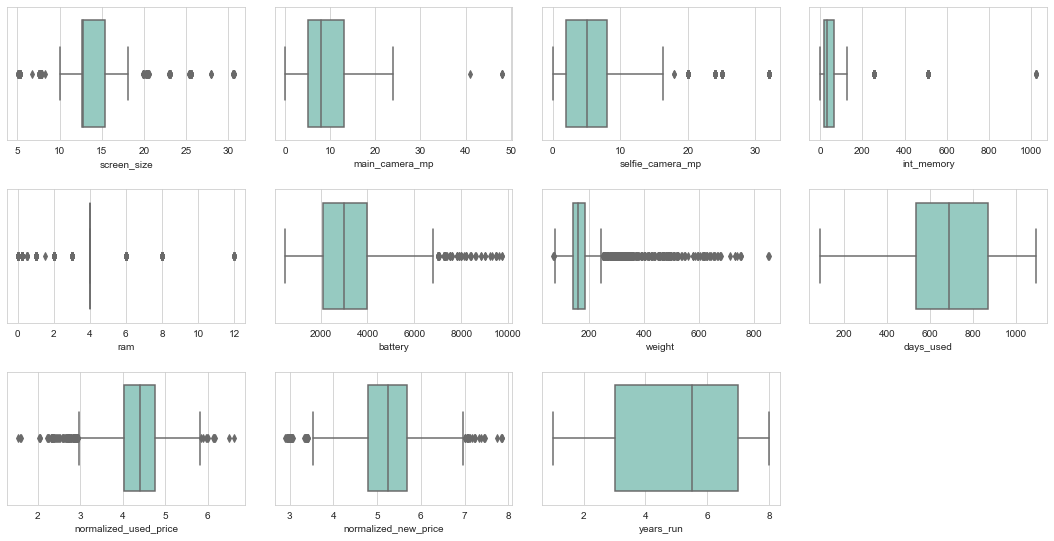

In [62]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

- We have identified outliers in our data, but we have decided not to remove them as they may provide valuable insights or contribute to a better understanding of the data. 

### Data Preparation for Modeling

In [63]:
X = df1.drop(["normalized_used_price"], axis=1) #We define our x(independent) variable
y = df1["normalized_used_price"] #Define the y(dependent) variable
X.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_run
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1


In [64]:
y.head()

0    4.307572
1    5.162097
2    5.111084
3    5.135387
4    4.389995
Name: normalized_used_price, dtype: float64

In [65]:
X = sm.add_constant(X) #function to add the intercept term to the independent variable

In [66]:
#creating dummies to the categorical data 
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [67]:
#splitting the data in train(70%) and test(30%)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [68]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## EDA

- It is a good idea to explore the data once again after manipulating it.

- We are going to perform EDA for the columns that we treat  
  - main_camera_mp
  - selfie_camera_mp
  - int_memory
  - ram
  - battery
  - weight

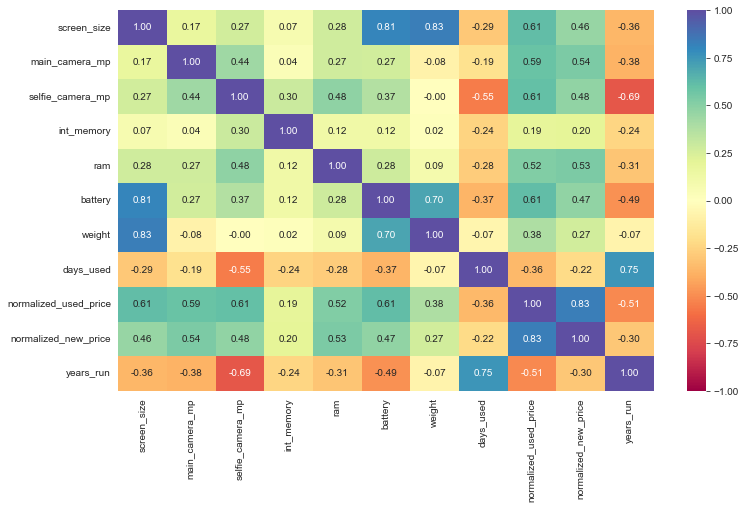

In [69]:
plt.figure(figsize=(12, 7)) #heatmap graph
sns.heatmap(df1[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

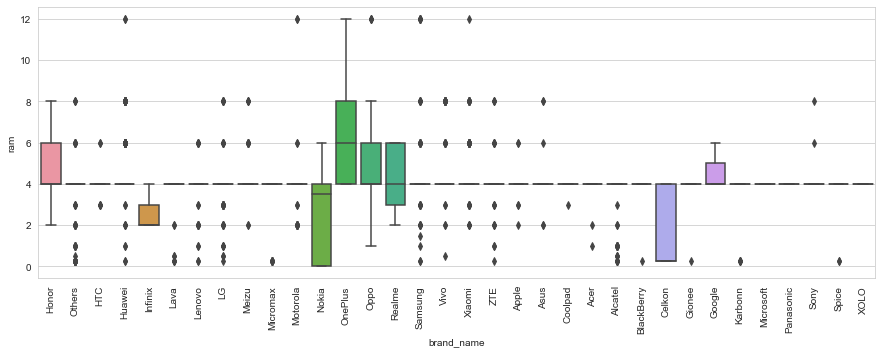

In [70]:
plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")
sns.set_palette("Set3")
sns.boxplot(data=df1,x="brand_name", y="ram")
plt.xticks(rotation=90);

- OnePlus offer in average the most ram
- Most of the brands offer at least 4gb in ram
- Celkon offer in average the phones with less ram

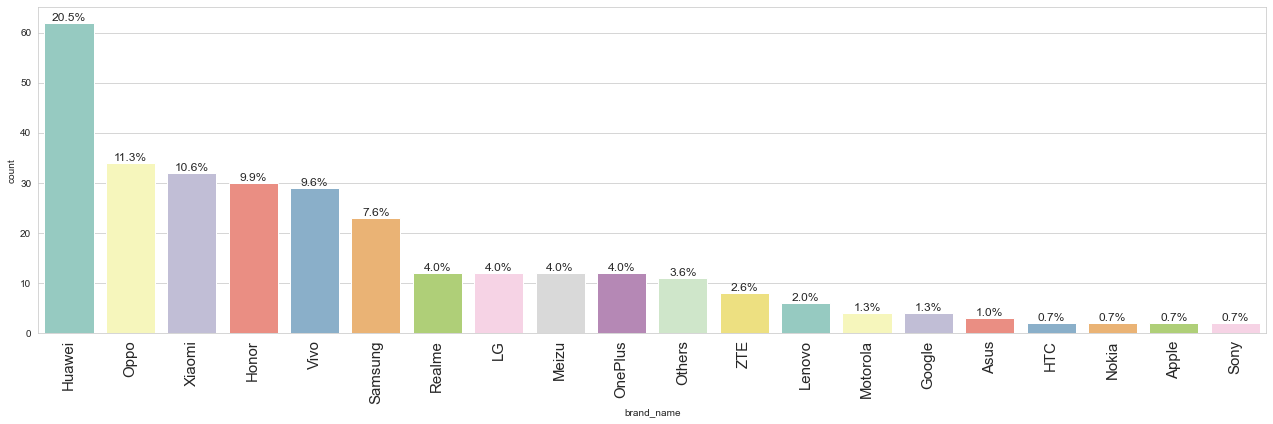

In [71]:
large_ram_2= df1[df1['ram'] > 4]
labeled_barplot(large_ram_2, "brand_name", perc=True);

- Huawei has 20,5% of the devices with more than 4 gb of ram, follow by Oppo with 11.3%

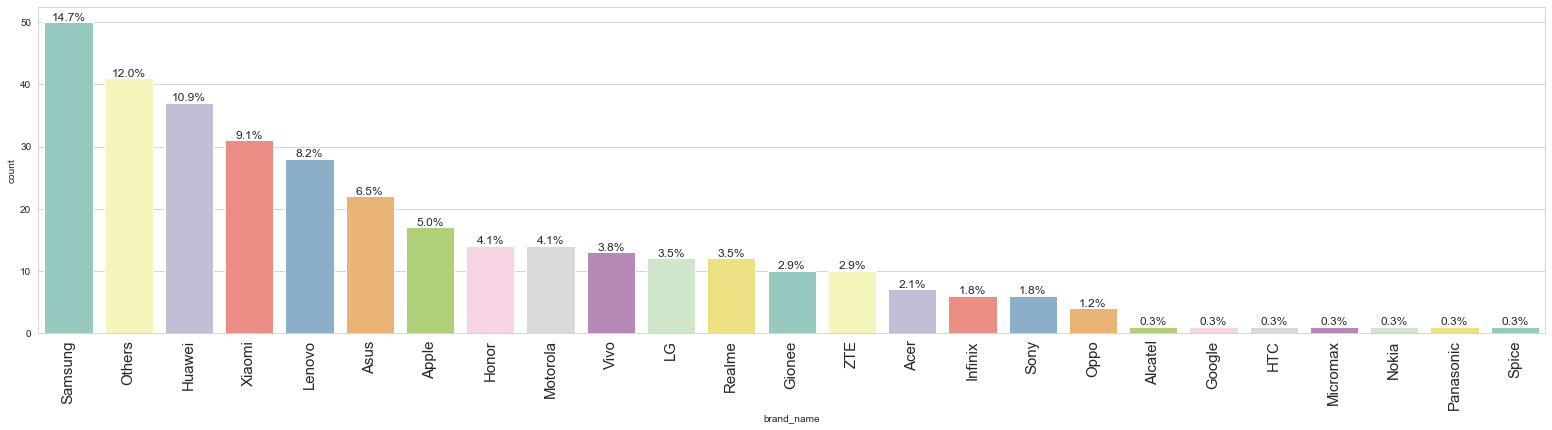

In [72]:
large_battery2 = df1[df1['battery'] > 4500]
labeled_barplot(large_battery2, "brand_name", perc=True);

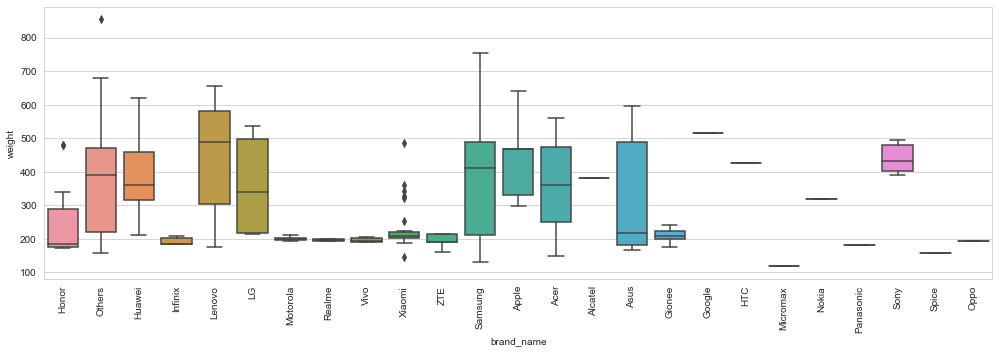

In [73]:
plt.figure(figsize=(17, 5))
sns.set_style("whitegrid")
sns.set_palette("Set3")
sns.boxplot(data=large_battery2,x="brand_name", y="weight")
plt.xticks(rotation=90);

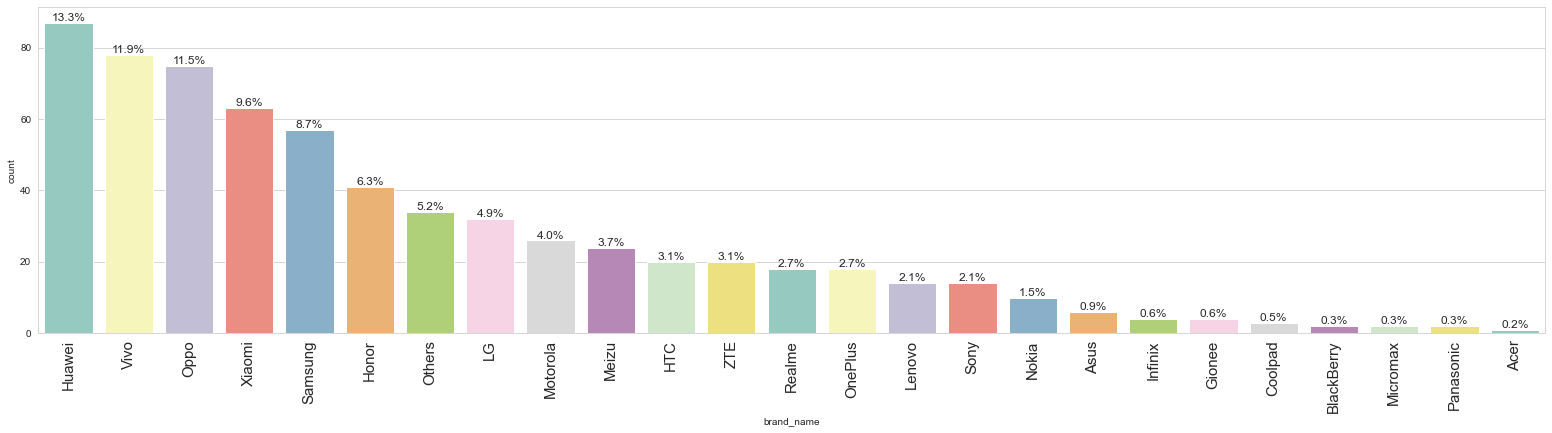

In [74]:
df_selfie_camera = df1[df1['selfie_camera_mp'] > 8]
labeled_barplot(df_selfie_camera, "brand_name", perc=True);

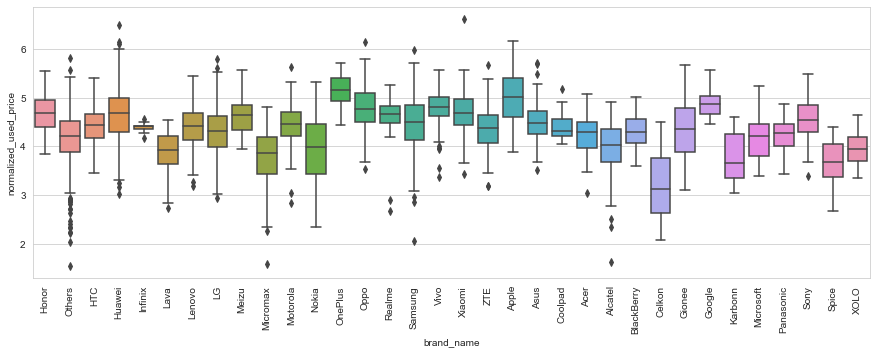

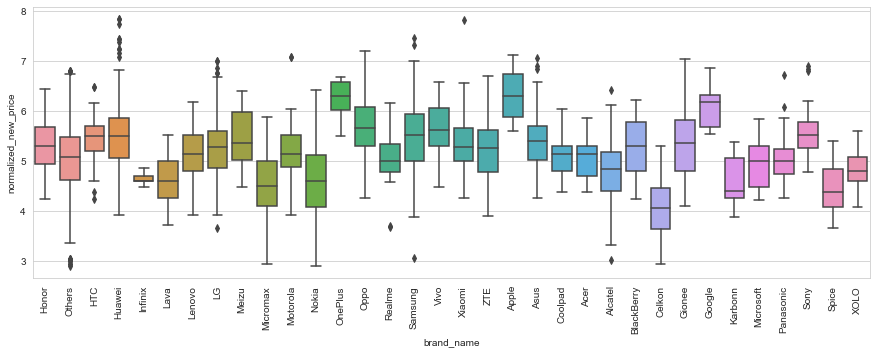

In [75]:
plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")
sns.set_palette("Set3")
sns.boxplot(data=df1,x="brand_name", y="normalized_used_price")
plt.xticks(rotation=90);
plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")
sns.set_palette("Set3")
sns.boxplot(data=df1,x="brand_name", y="normalized_new_price")
plt.xticks(rotation=90);

- On average and as expected used devices have a lower range of prices.

### Used Price > 5 vs Brand

In [76]:
price=df1[(df1['normalized_new_price'] > 5)]

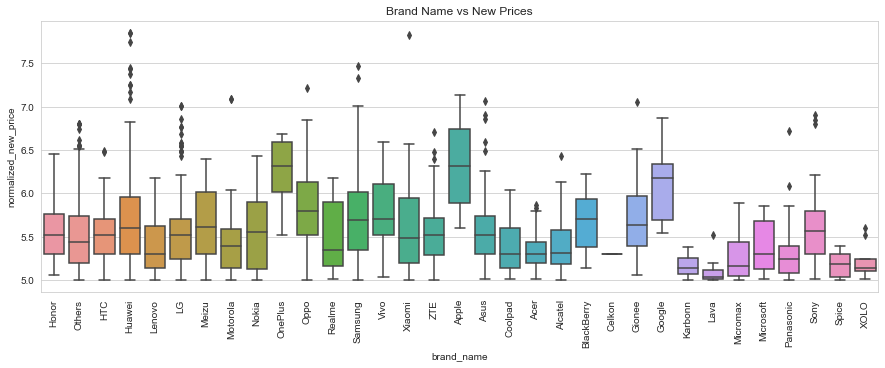

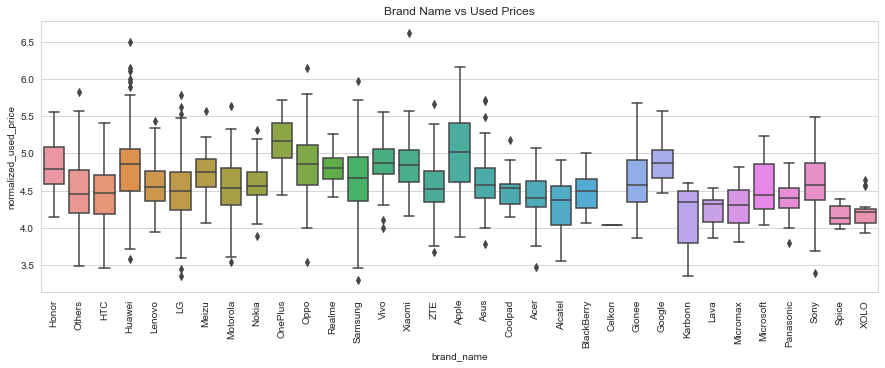

In [77]:
plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")
sns.set_palette("Set3")
sns.boxplot(data=price,x="brand_name", y="normalized_new_price")
plt.title('Brand Name vs New Prices')
plt.xticks(rotation=90);
plt.figure(figsize=(15, 5))
sns.set_style("whitegrid")
sns.set_palette("Set3")
sns.boxplot(data=price,x="brand_name", y="normalized_used_price")
plt.title('Brand Name vs Used Prices')
plt.xticks(rotation=90);

- When we compare the prices of new devices with prices of the same devices when used, we can observe that around 75% of the devices that were priced over 5 when they were new, now experience a decrease in price and are valued at under 5 when used.

## Model Building - Linear Regression

In [78]:
olsmodel = sm.OLS(y_train, x_train).fit() #building the first model
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Fri, 08 Sep 2023   Prob (F-statistic):               0.00
Time:                           09:41:05   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Interpreting the Regression Results:
- R-squared= 0.845, this means that the model explains 84.5% of the variance in the dependent variable.
- Adjusted R-squared= 0.842, this means the model has a good fit.

- The const coefficient is the Y-intercept of the model is 1.3158, that means that if all the independent variables are set to zero, the used devices price is expected to be 1.3158 units.

- The dummy variables are those for each brand name of mobile phones. But, most of these dummy variables are not statistically significant, which means that they do not have a significant effect on the used device's price.

### Model Performance Check

In [79]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [80]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [81]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


- RMSE: The values of train and test data are comparable and indicate a better fit of the model to the training data.
- MAE: suggests that the model can predict prices for used devices within a mean error of 0.18 on the test data.
- Adj. R-squared: 0.84 on the training data, so the model is not underfitting
- MAPE:This means that we are able to predict within 4.5% of the used device price on the test data .

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### Test for Multicollinearity

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors): 
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [83]:
checking_vif(x_train)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

* There are columns with very high VIF values, indicating presence of strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

In [84]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [85]:
multi_columns_high = ["screen_size", "weight"] #creating a variable with high

res = treating_multicollinearity(x_train, y_train, multi_columns_high)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


In [86]:
drop_column = "screen_size" #dropping the column
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(drop_column)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(drop_column)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", drop_column)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,202.673906
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,years_run,4.730315


- There are not numerical columns with VIF > 5
- We ignore the VIF values for dummy variables and the constant (intercept) 
- We have dealt with multicollinearity in the data

In [87]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Fri, 08 Sep 2023   Prob (F-statistic):               0.00
Time:                           09:41:12   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


- R-squared has dropped from 0.842 to 0.838
- there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.

### Dealing with high p-value variables

- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

In [88]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]
    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()
    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)
    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_run', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [89]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [90]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Fri, 08 Sep 2023   Prob (F-statistic):               0.00
Time:                           09:41:13   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [91]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [92]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


* Now there are not p-value greater than 0.05, so we'll consider the features in *x_train3* as the final set of predictor variables and *olsmod2* as the final model to move forward with.
* Now adjusted R-squared is 0.838, that means our model is able to explain 84% of the variance
* The adjusted R-squared in the olsmod1 (where we considered the variables without multicollinearity) was 0.838
    * This shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting.

### Test for linearity and independence

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent

In [93]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


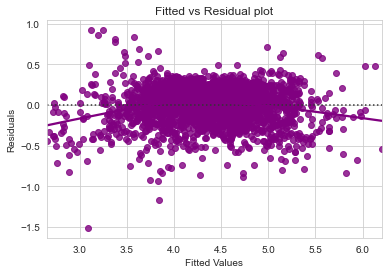

In [94]:
# plotthig the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exists any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

### Test for normallity

- The shape of the histogram of residuals can give an initial idea about the normality.
- It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

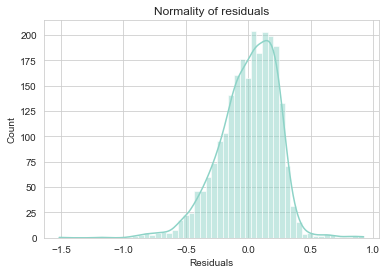

In [95]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residual has a bell shape, normal distribution.

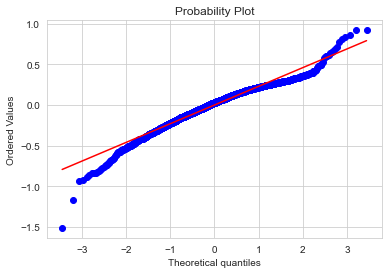

In [96]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab) #q-q plot
plt.show()

- The residuals more or less follow a straight line except for the tails.

In [97]:
stats.shapiro(df_pred["Residuals"]) #Shapiro formula to find the p-value

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995261942370773e-23)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
However, as an approximation, we can accept this distribution as close to being normal.
- So, the assumption is satisfied.

### Test for homoscedasticity

- The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
- The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

In [98]:
import statsmodels.stats.api as sms #importing library we need to apply goldfeld-quandt
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3) # applying the Goldfeld–Quandt test to check for homoscedasticity 
lzip(name, test)

[('F statistic', 1.008750419910676), ('p-value', 0.4401970650667301)]

- Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

### Prediction on Test Data

In [99]:
# predictions on the test set
pred_test = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred_test})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.385671
2341,3.696103,4.003934
1913,3.592093,3.643812
688,4.306495,4.103463
650,4.522115,5.113026
2291,4.259294,4.398406
40,4.997685,5.459871
1884,3.875359,4.053143
2538,4.206631,4.035868
45,5.380450,5.227899


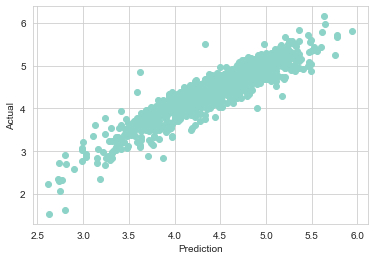

In [100]:
plt.scatter(df_pred_test["Predicted"], df_pred_test["Actual"])
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

In [101]:
# predictions on the train set
pred_train = olsmod2.predict(x_train3)
df_pred_train = pd.DataFrame({"Actual": y_train, "Predicted": pred_train})
df_pred_train.sample(10, random_state=1)

,Actual,Predicted
448,4.094345,3.998149
2129,4.839768,4.784617
2921,5.399836,5.239427
2133,4.966614,4.945631
3011,3.977811,3.930186
2574,4.145038,3.372055
2948,4.424367,4.489429
3103,4.240751,4.170908
1905,3.898532,4.130946
832,3.798406,3.901489


## Final Model

In [102]:
x_train_final = x_train3.copy() 
x_test_final = x_test3.copy()

In [103]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Fri, 08 Sep 2023   Prob (F-statistic):               0.00
Time:                           09:41:16   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [104]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [105]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


## Actionable Insights and Recommendations 

Findings after bulding and analyze the final linear regression to predict the price of a used device in ReCell.

1. The model has a R-squared of 0.839, that means we can explain 84% of the variation in the data, or in another words tells us how well the independent variables(features) can predict the variation in the price for used devices.

2.  The Mape(mean absolute percentage error) on the test set suggests that the model can predict the used price with an average error of 4.5% above or below the actual price. This means that, on average, the predicted price is within 4.5% of the actual price.

3. The RMSE and MAE for the training and testing data are low and comparable. which means the model is not overfitting.

4. If the price of a new device increases by one unit, then the price for a used device increases by 0.4415 Euros.
5. If the megapixels main camera increases by one unit, then the price for a used device increases by 0.0210 Euros.
6. If the megapixels of the selfie camera increases by one unit, then the price for a used device increases by 0.0138 Euros.
7. Based on our analysis, we conclude that the final model is good to predict outcomes and draw meaningful insights.
8. Based on the findings from the analysis, we can offer some recommendations for businesses to consider:
    - Focus on the certain features of a used device that increase or decrease its price. Features that increase the price of a used device include: higher megapixels for both the main camera and the selfie camera, higher RAM, lower weight, and higher normalized new price. On the other hand, features that decrease the price of a used device include a high used age, and certain brand names like Samsung and Sony.

    - Keep a diverse offer of operating system, but have in mind that for a device that runs on an operating system other than Android or iOS ("os_Others"), then the price for a used device decreases by 0.1276 Euros. This suggests that devices running on less popular or less commonly used operating systems are less desirable to consumers in the used market.

    - iO's operating system is popular and it has a specific market. If the device runs on the iOS operating system, then the price for a used device decreases by 0.0900 Euros. This may be because iOS devices normally have higher retail prices for brand news compared to Android or other operating system, and this may cause its used prices depreciate faster.

    - Devices supporting 4G network connectivity have an increase of price of 0.0502 Euros. This may be related to the fact that 4G is a more widely available and established network standard, making devices with 4G connectivity more desirable to consumers.

    - If the device supports 5G network connectivity, the price for a used device decreases by 0.0673 Euros. This may be because 5G is a relatively new and emerging network standard, and consumers may not yet be willing to pay a premium for devices with 5G connectivity in the used market. Additionally, 5G may not yet be widely available in all regions, further limiting the appeal of devices with 5G connectivity.


___